In [2]:
# para rodar no colab
#!pip uninstall networkx -y
#!pip install networkx==2.3
import networkx
networkx.__version__

'2.3'

In [3]:
#Adicionando biblioteca "nx@networkx" para gerenciamento e produção de graficos 
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import math as mt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import random
import warnings
import networkx.algorithms.community as nx_comm
import os as os
from scipy.linalg import expm
from scipy.stats import moment
from scipy.stats import entropy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from networkx.algorithms import community
from networkx.algorithms.community import LFR_benchmark_graph
from sklearn.metrics import normalized_mutual_info_score
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities
#from community import community_louvain
#from google.colab import drive

warnings.filterwarnings('ignore')
np.random.seed(50)
#drive.mount('/content/drive/')
#definindo dimesões padrão para plot
plt.rcParams['figure.figsize'] = (11,7)



In [4]:
def plot_grafo(grafo):
    plots = nx.spring_layout(grafo)
    nx.draw(grafo, with_labels = True, node_size=1, font_size=10, pos = plots)
    plt.show(True)

In [5]:
def plot_grafo_anel(grafo):
    pos = nx.circular_layout(grafo);
    plt.figure(figsize=(8,8));
    plt.axis("off");
    nx.draw_networkx_nodes(grafo, pos, node_size=300, node_color="black");
    nx.draw_networkx_edges(grafo, pos, alpha=0.500);
    nx.draw_networkx_labels(grafo, pos, font_color="white");
    plt.show();

## Questão1 

In [6]:
# função obtem e armazena o numero de arrstas das redes
def number_edges(G):
    #numero de arrestas em nas redes
    medida = []
    for i in range(30):
        medida.append(G[i].number_of_edges())
    return medida

In [20]:
def average_degre(G):
    #Grau médio das redes 
    medida = []
    for i in range(30):
        d = dict(G[i].degree()) #discionario de grau por no
        d = list(d.values()) #passando para lista apenas com os graus
        d = np.mean(d)      #media do grau
        medida.append(d)
    return medida

In [47]:
def second_moment(G):
    #Grau médio das redes 
    
    medida = []   
    for i in range(30):
        d = dict(G[i].degree()) #discionario de grau por no
        degree = list(d.values()) #passando para lista apenas com os graus
        medida.append(moment(degree, moment=2))
    return medida

In [68]:
def average_shortest_path_length(G):
    #Grau médio das redes 
    medida = [] 
    sub_medida = [] 
    for i in range(30): 
        print(i)
        if(nx.is_connected(G[i])):
            medida.append(nx.average_shortest_path_length(G[i]))
            print(medida[i])
        else:
            for g in nx.connected_component_subgraphs(G[i]):
                sub_medida.append(nx.average_shortest_path_length(g))
                print("componente")
                print(np.mean(sub_medida))
            medida.append(np.mean(sub_medida))
    return medida

In [31]:
RE = []
for i in range(30):# Gerando rede aleatória Erdos-Renyi com os seguintes parametros
    N = 1000 # numero de nos
    av_degree = 10 #Grau médio
    p = av_degree/(N-1) #probabilidade do grau

    #função geradora
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    RE.append(GER)

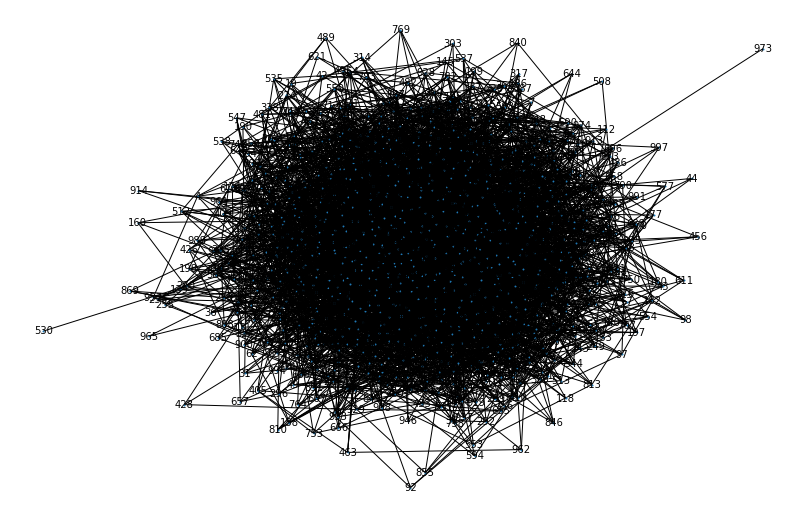

In [32]:
plot_grafo(RE[0])

In [33]:
RE_edges = number_edges(RE)

In [34]:
RE_average_degree = average_degre(RE)

In [49]:
RE_second_moment = second_moment(RE)

In [69]:
RE_average_shortest_path_length= average_shortest_path_length(RE)

0
3.29021021021021
1
3.2194054054054053
2
componente
3.2435662115020834
componente
1.6217831057510417
3
3.253007007007007
4
componente
2.173654616540388
componente
1.6302409624052911
5
3.2524184184184186
6
3.229951951951952
7
3.2666826826826827
8
3.2713673673673673
9
3.2630730730730733
10
3.256894894894895
11
3.2736236236236236
12
3.274194194194194
13
3.230098098098098
14
3.211661661661662
15
3.2500880880880882
16
3.2652752752752754
17
3.256238238238238
18
3.2467407407407407
19
3.255233233233233
20
3.244890890890891
21
3.26416016016016
22
3.2483483483483484
23
3.2805125125125123
24
3.265783783783784
25
3.2884704704704704
26
3.2741001001001
27
3.237805805805806
28
3.268968968968969
29
3.263083083083083


In [ ]:
redes_watts = []
for i in range(30):# Gerando rede aleatória Erdos-Renyi com os seguintes parametros
    N = 1000# numero de nós
    av_degree = 10 # grau médio
    k = int(av_degree/2)# Cada nó está conectado aos k vizinhos mais próximos na topologia em anel
    p = 0.01 #probabilidade de religação
    GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
    redes_watts.append(GWS)

In [ ]:
plot_grafo_anel(redes_watts[0])

In [ ]:
#numero de arrestas
redes_erdos


In [ ]:
# Gerando rede aleatória  Barabási-Albert  com os seguintes parametros
redes_Albert = []

for i in range(30):
    N = 1000 # numero de nos
    av_degree = 10#Grau médio
    m = int(av_degree/2)#probabilidade do grau
    GBA = nx.barabasi_albert_graph(N, m)
    redes_Albert.append(GBA)

In [ ]:
plot_grafo(redes_Albert[0])